# K - means algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('/Users/janakiramanprakash/Desktop/netzwerk/assignments/Mall_Customers.csv')

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.shape

(200, 5)

In [7]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.drop('CustomerID',axis = 1, inplace = True)

In [9]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [11]:
print('unique values in genre : ', df['Genre'].unique() )

unique values in genre :  ['Male' 'Female']


In [12]:
df['Genre'] = pd.get_dummies(df['Genre'],drop_first = True)

In [13]:
Colors = ['red','green','blue','brown','orange']

In [58]:

def elbow_plot(x):
    wcss = []
    for i in range (1,11):
        model = KMeans(n_clusters = i, random_state = 0)
        model.fit(x)
        wcss.append(model.inertia_)
    plt.plot(range(1,11),wcss)
    plt.xlabel('k-means >>>>>>>>>>')
    plt.ylabel('error-term >>>>>>>')
    plt.title('Elbow_Plot')
    plt.show()



In [76]:
def visualize_clusters(model,x,k_pred,k_value):
    for i in range(4):
        plt.scatter(x[k_pred == i,0],x[k_pred == i,1], s = 50 , c = Colors[i] )
        
    plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1], s=100 , c = 'black')
    plt.xlabel('Annual income')
    plt.ylabel('Spending Score')
    plt.title('clusters')
    plt.legend(range(4))
    plt.show()

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/clust

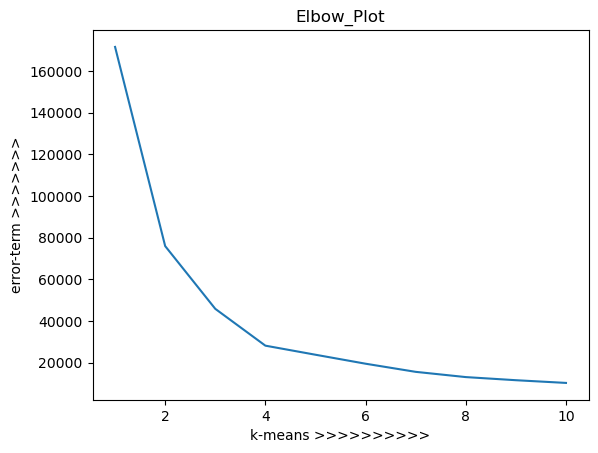

In [77]:
x = df.iloc[:,[1,3]].values
elbow_plot(x)

/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


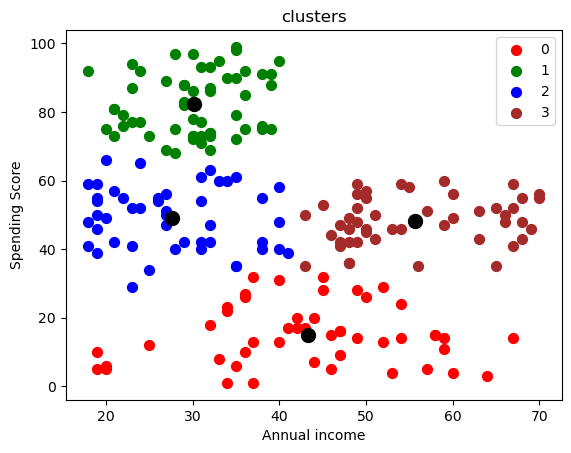

In [78]:

model = KMeans(n_clusters = 4, random_state = 0)
k_pred = model.fit_predict(x)
visualize_clusters(model,x,k_pred,4)